# Session 2 - k-최접점 이웃 모델 구현하기

어쩌면 어떤 개발자는 Session 1에서 구현했던 선형 모델은 손실이 너무 많음을 깨달아 다른 모델로 바꾸기로 결정할 수 있다. k-최접점 이웃은 하나의 레이블에서 k개 만큼의 가장 가까운 레이블들의 평균을 계산하는 알고리즘으로 특정 레이블에서 손실이 많을 수 있는 선형 모델보다 더 일반화될 것이라고 구상할 수 있다. 이를 scikit-learn 라이브러리의 KNeighborsRegressor 메서드로 구현할 것이다.

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## 데이터셋 불러오기

In [2]:
dataset = pd.read_csv('student_score.csv')
dataset.head()

,Time,Score
0,22.10,80.7
1,13.30,48.5
2,13.20,63.6
3,20.10,83.6
4,0.31,11.5


## k-최접점 이웃 모델을 훈련 데이터로 학습하기

In [3]:
x = dataset[['Time']]
y = dataset[['Score']]

k_neighbor_model = KNeighborsRegressor(n_neighbors=3)
# k_neighbor_model 객체는 주변 3개의 레이블들의 평균을 내놓는 모델
k_neighbor_model.fit(x, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

## 학습 결과 시각화

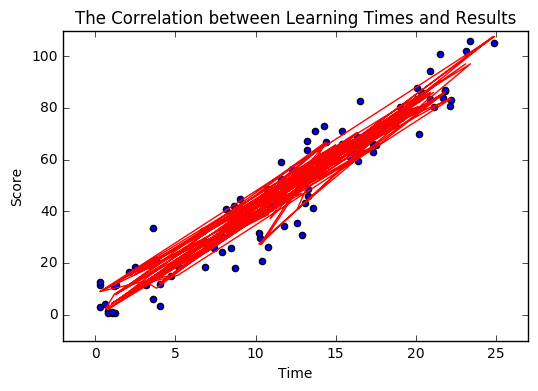

In [12]:
dataset.plot(kind='scatter', x = "Time", y = "Score")
plt.title("The Correlation between Learning Times and Results")
plt.plot(x, k_neighbor_model.predict(x), "r-")
plt.axis((-2, 27, -10, 110))
plt.show()

## 손실 계산하기

In [13]:
rmse = np.sqrt(mean_squared_error(x, k_neighbor_model.predict(x)))
print(rmse)

41.88054421018322


이를 통해 이 데이터셋의 회귀 구현에서 k-최접점 이웃 모델은 선형 모델과 별 차이가 없다는 것을 알 수 있다. 심지어 k-최접점 이웃 모델이 손실 값이 더 크다. 그러므로 다른 모델을 채택하거나 손실을 줄이기 위해 경사 하강법 등을 이용하여야 할 것이다.

## 테스트 데이터 예측하기

In [14]:
test_student = [[14.6]]
print(k_neighbor_model.predict(test_student))

[[62.63333333]]


이와 같이 k-최접점 모델에 데이터를 넣으면 약 62점 정도가 나올 것이라고 예측할 수 있다.